<a href="https://colab.research.google.com/github/Dienadf/esg-investor-segmentation/blob/main/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/content/base_clients_asset_manager_simule.csv")

#Variables ESG
esg_vars = ["%_Encours_ESG","Nb_Fonds_Labellises","Vote_AG_ESG",
            "Engagement_Campagne","Croissance_Encours_ESG","Interet_Exprime"]

#Normalisation
for v in esg_vars:
    df[v+"_norm"] = (df[v] - df[v].min()) / (df[v].max() - df[v].min())

#Score ESG pondéré
weights = {
    "%_Encours_ESG_norm": 0.30,
    "Nb_Fonds_Labellises_norm": 0.15,
    "Vote_AG_ESG_norm": 0.10,
    "Engagement_Campagne_norm": 0.10,
    "Croissance_Encours_ESG_norm": 0.20,
    "Interet_Exprime_norm": 0.15,
    }

#Calcul du score ESG pondéré
df["Score_ESG"] = sum(df[c] * w for c, w in weights.items())


In [4]:
# Sélection des variables pour segmenter
features = ["Score_ESG", "Fidelite_Score", "Churn", "Upsell_Potentiel"]

# On enlève les lignes incomplètes sur ces variables
X = df[features].dropna().copy()

# On choisit 3 groupes pour entrainer le modèle
kmeans = KMeans(n_clusters=3, random_state=42)
df.loc[X.index, "Cluster"] = kmeans.fit_predict(X)

#Noms métiers aux clusters selon le Score ESG moyen
ordre = df.groupby("Cluster")["Score_ESG"].mean().sort_values().index  # du plus faible au plus fort
labels = ["Clients à convaincre", "À potentiel latent", "Champions ESG"]
mapping = {ordre[i]: labels[i] for i in range(3)}
df["Profil_Segment"] = df["Cluster"].map(mapping)

# Petit aperçu
df[["Score_ESG", "Fidelite_Score", "Upsell_Potentiel", "Profil_Segment"]].head()


,Score_ESG,Fidelite_Score,Upsell_Potentiel,Profil_Segment
0,0.365582,0.11,0.61,À potentiel latent
1,0.484020,0.63,0.52,Clients à convaincre
2,0.722357,0.77,0.74,Champions ESG
3,0.568778,0.00,0.63,Champions ESG
4,0.468502,0.86,0.55,Champions ESG


**Tableaux d'insights **

In [5]:
# Synthèse par segment
resume_segments = (
    df.groupby("Profil_Segment")[["Score_ESG","NPS","Fidelite_Score","Churn","Upsell_Potentiel"]]
      .mean()
      .round(2)
      .sort_values("Score_ESG")
)
print("Synthèse par segment :\n", resume_segments, "\n")
display(resume_segments)  # affichage direct dans Colab


# Score ESG moyen par segment x type d’investisseur (si colonnes présentes)
if {"Profil_Segment","Type_Investisseur"}.issubset(df.columns):
    vue_type = (
        df.groupby(["Profil_Segment","Type_Investisseur"])["Score_ESG"]
          .mean()
          .round(2)
          .reset_index()
          .sort_values(["Profil_Segment","Score_ESG"])
    )
print("Score ESG moyen par segment × type d’investisseur :\n", vue_type.head(), "\n")
display (vue_type.head)

# Score ESG moyen par segment x pays
if {"Profil_Segment","Pays"}.issubset(df.columns):
    vue_pays = (
        df.groupby(["Profil_Segment","Pays"])["Score_ESG"]
          .mean()
          .round(2)
          .reset_index()
          .sort_values(["Profil_Segment","Score_ESG"])
    )
print("Score ESG moyen par segment × pays :\n", vue_pays.head(), "\n")
display (vue_pays.head)


Synthèse par segment :
                       Score_ESG   NPS  Fidelite_Score  Churn  Upsell_Potentiel
Profil_Segment                                                                
Clients à convaincre       0.47 -6.64            0.77    0.0              0.43
À potentiel latent         0.50  0.37            0.30    0.0              0.58
Champions ESG              0.51 -4.41            0.57    1.0              0.53 



,Score_ESG,NPS,Fidelite_Score,Churn,Upsell_Potentiel
Profil_Segment,,,,,
Clients à convaincre,0.47,-6.64,0.77,0.0,0.43
À potentiel latent,0.50,0.37,0.30,0.0,0.58
Champions ESG,0.51,-4.41,0.57,1.0,0.53


Score ESG moyen par segment × type d’investisseur :
          Profil_Segment Type_Investisseur  Score_ESG
2         Champions ESG       Particulier       0.47
1         Champions ESG    Institutionnel       0.52
0         Champions ESG     Family Office       0.61
4  Clients à convaincre    Institutionnel       0.46
5  Clients à convaincre       Particulier       0.46 



<bound method NDFrame.head of          Profil_Segment Type_Investisseur  Score_ESG
2         Champions ESG       Particulier       0.47
1         Champions ESG    Institutionnel       0.52
0         Champions ESG     Family Office       0.61
4  Clients à convaincre    Institutionnel       0.46
5  Clients à convaincre       Particulier       0.46
3  Clients à convaincre     Family Office       0.53
6    À potentiel latent     Family Office       0.47
7    À potentiel latent    Institutionnel       0.50
8    À potentiel latent       Particulier       0.51>

Score ESG moyen par segment × pays :
   Profil_Segment       Pays  Score_ESG
3  Champions ESG     Italie       0.40
4  Champions ESG   Pays-Bas       0.48
2  Champions ESG     France       0.52
1  Champions ESG    Espagne       0.53
0  Champions ESG  Allemagne       0.57 



<bound method NDFrame.head of           Profil_Segment       Pays  Score_ESG
3          Champions ESG     Italie       0.40
4          Champions ESG   Pays-Bas       0.48
2          Champions ESG     France       0.52
1          Champions ESG    Espagne       0.53
0          Champions ESG  Allemagne       0.57
6   Clients à convaincre    Espagne       0.44
9   Clients à convaincre   Pays-Bas       0.45
7   Clients à convaincre     France       0.48
8   Clients à convaincre     Italie       0.49
5   Clients à convaincre  Allemagne       0.51
10    À potentiel latent  Allemagne       0.41
13    À potentiel latent     Italie       0.49
14    À potentiel latent   Pays-Bas       0.49
11    À potentiel latent    Espagne       0.53
12    À potentiel latent     France       0.55>

**Visuels **

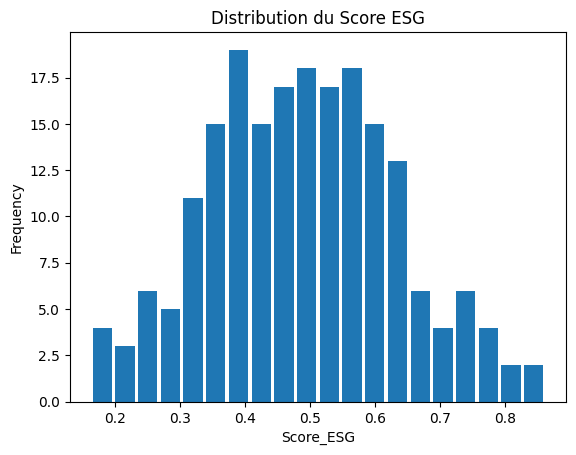

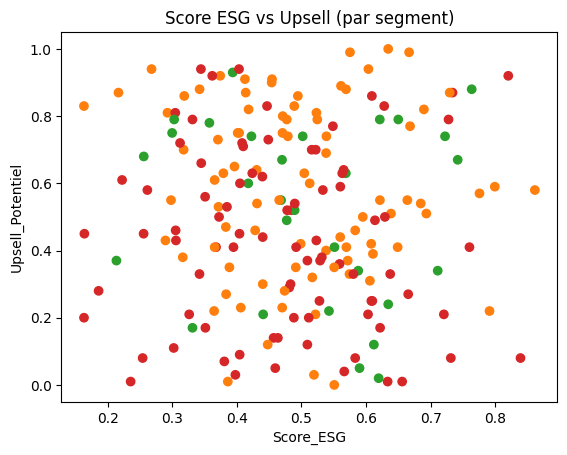

In [6]:
# Histogramme du Score ESG
df["Score_ESG"].plot(kind="hist", bins=20, rwidth=0.85, title="Distribution du Score ESG")
plt.xlabel("Score_ESG"); plt.show()

# Nuage Score ESG vs Upsell, coloré par segment
couleurs = df["Profil_Segment"].map({
    "Clients à convaincre":"tab:red",
    "À potentiel latent":"tab:orange",
    "Champions ESG":"tab:green"
})
plt.scatter(df["Score_ESG"], df["Upsell_Potentiel"], c=couleurs)
plt.title("Score ESG vs Upsell (par segment)")
plt.xlabel("Score_ESG"); plt.ylabel("Upsell_Potentiel")
plt.show()

**Export final **

In [7]:
colonnes_export = [
    "Type_Investisseur","Pays","Encours_Millions","Profil_Risque","Segment_Marketing",
    "Score_ESG","Profil_Segment","NPS","Fidelite_Score","Churn","Upsell_Potentiel"
]
# On garde seulement celles qui existent (au cas où)
colonnes_export = [c for c in colonnes_export if c in df.columns]

df[colonnes_export].to_csv("/content/clients_esg_segmentes.csv", index=False)
print("Export final : /content/clients_esg_segmentes.csv")

# Export résumé des segments
resume_segments.to_csv("/content/resume_segments.csv")





Export final : /content/clients_esg_segmentes.csv
